<a href="https://colab.research.google.com/github/Note-YH/Visualizing_data/blob/Pre_data_Check-up/Sejong_people_by_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filename = '/content/drive/MyDrive/Sejong/22.세종시_연령별_인구현황.csv'

Sejong_people = pd.read_csv(filename)
Sejong_people.head()

,읍면동,201701_남자(총_거주자_수),201701_남자(연령구간인구수),201701_남자(0~9세),201701_남자(10~19세),201701_남자(20~29세),201701_남자(30~39세),201701_남자(40~49세),201701_남자(50~59세),201701_남자(60~69세),201701_남자(70~79세),201701_남자(80~89세),201701_남자(90~99세),201701_남자(100세_이상),201701_여자(총_거주자_수),201701_여자(연령구간인구수),201701_여자(0~9세),201701_여자(10~19세),201701_여자(20~29세),201701_여자(30~39세),201701_여자(40~49세),201701_여자(50~59세),201701_여자(60~69세),201701_여자(70~79세),201701_여자(80~89세),201701_여자(90~99세),201701_여자(100세_이상),201702_남자(총_거주자_수),201702_남자(연령구간인구수),201702_남자(0~9세),201702_남자(10~19세),201702_남자(20~29세),201702_남자(30~39세),201702_남자(40~49세),201702_남자(50~59세),201702_남자(60~69세),201702_남자(70~79세),201702_남자(80~89세),201702_남자(90~99세),201702_남자(100세_이상),...,202011_남자(100세_이상),202011_여자(총_거주자_수),202011_여자(연령구간인구수),202011_여자(0~9세),202011_여자(10~19세),202011_여자(20~29세),202011_여자(30~39세),202011_여자(40~49세),202011_여자(50~59세),202011_여자(60~69세),202011_여자(70~79세),202011_여자(80~89세),202011_여자(90~99세),202011_여자(100세_이상),202012_남자(총_거주자_수),202012_남자(연령구간인구수),202012_남자(0~9세),202012_남자(10~19세),202012_남자(20~29세),202012_남자(30~39세),202012_남자(40~49세),202012_남자(50~59세),202012_남자(60~69세),202012_남자(70~79세),202012_남자(80~89세),202012_남자(90~99세),202012_남자(100세_이상),202012_여자(총_거주자_수),202012_여자(연령구간인구수),202012_여자(0~9세),202012_여자(10~19세),202012_여자(20~29세),202012_여자(30~39세),202012_여자(40~49세),202012_여자(50~59세),202012_여자(60~69세),202012_여자(70~79세),202012_여자(80~89세),202012_여자(90~99세),202012_여자(100세_이상)
0,세종특별자치시,121937,121937,17864,13917,13463,22372,23665,15288,8922,4631,1683,132,0,121988,121988,17255,13513,13188,23558,20821,14115,9251,6161,3555,545,26,123257,123257,18115,14197,13461,22535,23999,15438,8994,4693,1694,131,0,...,4,176541,176541,23024,21093,18172,31294,33272,21465,14957,7685,4660,896,23,176998,176998,24183,21417,19020,29931,35054,23347,14845,6562,2384,252,3,177707,177707,23090,21252,18385,31411,33519,21592,15113,7736,4672,915,22
1,조치원읍,23529,23529,2525,2473,3461,3783,4126,3393,2131,1214,389,34,0,22496,22496,2386,2378,2950,3356,3550,3188,2227,1573,763,118,7,23526,23526,2506,2493,3462,3766,4112,3391,2143,1226,392,35,0,...,1,20649,20649,1564,2057,2785,2433,3196,3128,2666,1718,936,159,7,22136,22136,1667,2128,3617,2970,3643,3508,2626,1351,563,62,1,20653,20653,1560,2050,2811,2436,3186,3110,2676,1725,930,162,7
2,연기면,1463,1463,56,93,220,176,263,296,203,112,38,6,0,1217,1217,61,75,148,127,137,226,174,151,107,11,0,1463,1463,58,90,218,177,268,289,205,113,39,6,0,...,0,1151,1151,44,55,151,105,101,213,215,140,103,23,1,1512,1512,40,53,220,230,208,318,275,118,50,0,0,1159,1159,41,54,156,104,109,210,221,138,102,23,1
3,연동면,1828,1828,87,123,210,228,247,368,318,156,87,4,0,1751,1751,102,85,187,162,178,281,273,239,209,34,1,1817,1817,85,117,202,233,244,369,317,159,87,4,0,...,0,1492,1492,45,64,113,116,124,245,308,223,212,42,0,1628,1628,43,65,190,159,201,300,372,189,97,12,0,1495,1495,48,63,112,116,123,245,307,224,212,45,0
4,부강면,3554,3554,235,287,472,505,588,650,396,290,124,7,0,3150,3150,235,253,341,325,418,540,440,378,197,22,1,3555,3555,238,288,467,504,583,655,393,294,126,7,0,...,0,2755,2755,163,170,246,263,315,456,509,351,250,31,1,3412,3412,169,208,486,448,506,643,527,265,145,15,0,2784,2784,166,170,255,274,314,457,511,353,251,32,1


In [ ]:
df1 = Sejong_people.set_index("읍면동")
df1.index

Index(['세종특별자치시', '조치원읍', '연기면', '연동면', '부강면', '금남면', '장군면', '연서면', '전의면',
       '전동면', '소정면', '한솔동', '새롬동', '도담동', '아름동', '종촌동', '고운동', '소담동', '보람동',
       '대평동', '다정동'],
      dtype='object', name='읍면동')

In [ ]:
df1.columns

Index(['201701_남자(총_거주자_수)', '201701_남자(연령구간인구수)', '201701_남자(0~9세)',
       '201701_남자(10~19세)', '201701_남자(20~29세)', '201701_남자(30~39세)',
       '201701_남자(40~49세)', '201701_남자(50~59세)', '201701_남자(60~69세)',
       '201701_남자(70~79세)',
       ...
       '202012_여자(10~19세)', '202012_여자(20~29세)', '202012_여자(30~39세)',
       '202012_여자(40~49세)', '202012_여자(50~59세)', '202012_여자(60~69세)',
       '202012_여자(70~79세)', '202012_여자(80~89세)', '202012_여자(90~99세)',
       '202012_여자(100세_이상)'],
      dtype='object', length=1248)

In [ ]:
col_1 = df1.columns
col_2 = []

for i in col_1 :
  a = i[:6]
  a = int(a)
  if a not in col_2 :
        col_2.append(a)

In [ ]:
df2 = pd.DataFrame(index=df1.index)

for i in col_2 :
  i = str(i)
  df2[i] = df1[i + '_남자(총_거주자_수)'] + df1[i + '_여자(총_거주자_수)']

df2.head()

,201701,201702,201703,201704,201705,201706,201707,201708,201709,201710,201711,201712,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012
읍면동,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
세종특별자치시,243925,246601,250147,253089,258138,262054,265063,268089,270363,273042,275823,279046,282136,287004,290126,293966,296536,299264,301624,304583,306994,309329,311024,313055,315743,319255,321615,323298,324669,326527,329197,330996,332621,335218,337505,339434,341196,342651,343637,344067,344239,344207,345082,346108,346901,349894,352309,354705
조치원읍,46025,46021,46022,45912,45642,45447,45452,45435,45410,45310,45179,45101,45043,44952,44957,44740,44631,44384,44228,44174,44380,44271,44192,44153,43931,43801,43664,43548,43612,43527,43351,43223,43212,43088,42957,42952,42888,42896,42864,42809,42803,42530,42555,42634,42707,42777,42720,42789
연기면,2680,2684,2682,2659,2683,2678,2674,2687,2706,2721,2701,2723,2717,2723,2705,2682,2670,2660,2675,2647,2652,2631,2633,2645,2643,2650,2641,2626,2621,2600,2567,2557,2557,2566,2554,2520,2528,2510,2547,2538,2548,2541,2551,2586,2614,2614,2649,2671
연동면,3579,3558,3550,3539,3520,3500,3504,3472,3467,3448,3428,3417,3404,3376,3353,3338,3335,3328,3328,3307,3286,3274,3255,3255,3253,3231,3222,3206,3215,3221,3197,3187,3195,3172,3159,3149,3139,3144,3143,3157,3147,3148,3139,3148,3127,3114,3120,3123
부강면,6704,6681,6647,6641,6595,6555,6521,6523,6506,6479,6437,6462,6456,6442,6379,6349,6354,6368,6336,6323,6291,6296,6311,6344,6343,6346,6329,6329,6347,6336,6326,6310,6304,6269,6244,6255,6224,6185,6147,6115,6118,6125,6138,6154,6153,6142,6157,6196


In [ ]:
df3 = df2.transpose()
df3.head()

읍면동,세종특별자치시,조치원읍,연기면,연동면,부강면,금남면,장군면,연서면,전의면,전동면,소정면,한솔동,새롬동,도담동,아름동,종촌동,고운동,소담동,보람동,대평동,다정동
201701,243925,46025,2680,3579,6704,9639,6246,7903,6407,3925,2833,35560,0,31338,50865,30221,0,0,0,0,0
201702,246601,46021,2684,3558,6681,9617,6281,7949,6402,3917,2822,22526,0,31639,24638,30609,26388,0,14869,0,0
201703,250147,46022,2682,3550,6647,9613,6317,7946,6388,3920,2813,22560,0,31883,24655,30673,26288,0,18190,0,0
201704,253089,45912,2659,3539,6641,9586,6350,7932,6351,3894,2814,24511,0,32100,24523,30604,26219,0,19454,0,0
201705,258138,45642,2683,3520,6595,9527,6318,7899,6333,3896,2805,29832,0,32030,24322,30408,26102,0,20226,0,0


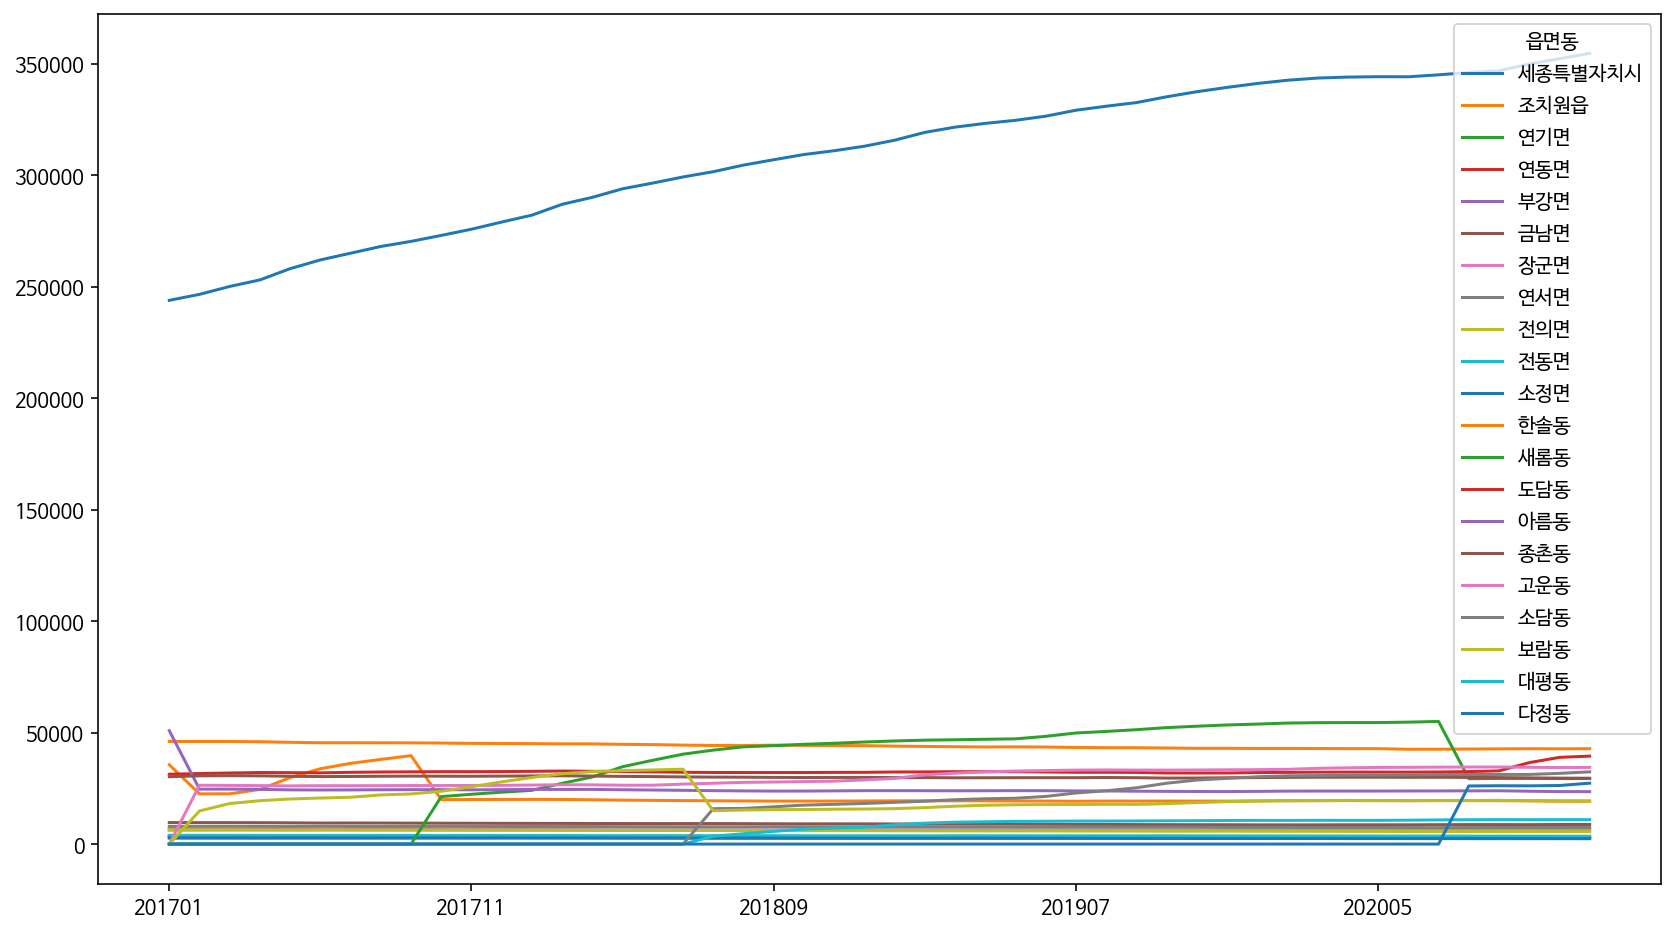

In [ ]:
df3.plot(figsize = (14,8))
plt.rc('font', family='NanumBarunGothic')
plt.show()

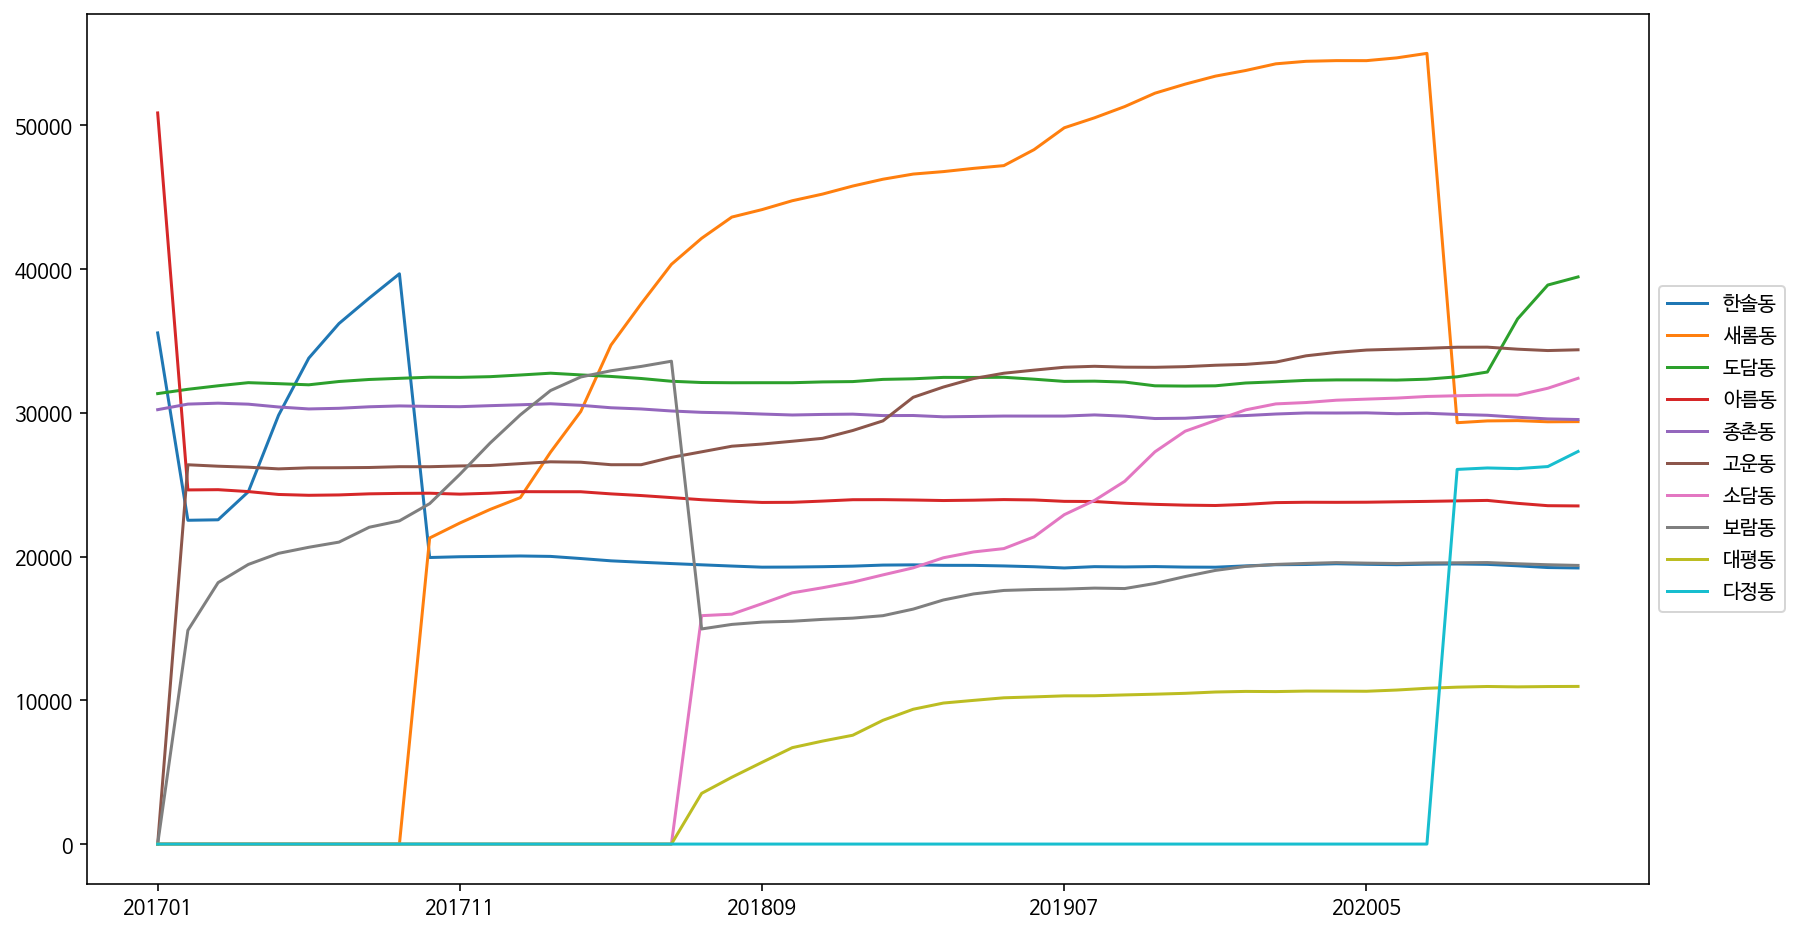

In [ ]:
df4 = df3.loc[:,'한솔동':]
df4.plot(figsize=(14, 8))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.rc('font', family='NanumBarunGothic')
plt.show()

In [ ]:
Sejong_new = Sejong_people.loc[:0,:]
Sejong_new = Sejong_new.transpose()
Sejong_new = Sejong_new.reset_index(drop=False,inplace=False).loc[1:,:]
Sejong_new.head(26)

,index,0
1,201701_남자(총_거주자_수),121937
2,201701_남자(연령구간인구수),121937
3,201701_남자(0~9세),17864
4,201701_남자(10~19세),13917
5,201701_남자(20~29세),13463
6,201701_남자(30~39세),22372
7,201701_남자(40~49세),23665
8,201701_남자(50~59세),15288
9,201701_남자(60~69세),8922
10,201701_남자(70~79세),4631


In [ ]:
index1 = Sejong_new['index']
index2 = []
for i in index1 :
  a = i[7:]
  if a not in index2 :
        index2.append(a)

index2

['남자(총_거주자_수)',
 '남자(연령구간인구수)',
 '남자(0~9세)',
 '남자(10~19세)',
 '남자(20~29세)',
 '남자(30~39세)',
 '남자(40~49세)',
 '남자(50~59세)',
 '남자(60~69세)',
 '남자(70~79세)',
 '남자(80~89세)',
 '남자(90~99세)',
 '남자(100세_이상)',
 '여자(총_거주자_수)',
 '여자(연령구간인구수)',
 '여자(0~9세)',
 '여자(10~19세)',
 '여자(20~29세)',
 '여자(30~39세)',
 '여자(40~49세)',
 '여자(50~59세)',
 '여자(60~69세)',
 '여자(70~79세)',
 '여자(80~89세)',
 '여자(90~99세)',
 '여자(100세_이상)']

In [ ]:
Sejong_SY = Sejong_new.iloc[:26,1:]
Sejong_SY.columns = [201701]
Sejong_SY['index'] = index2
Sejong_SY = Sejong_SY.set_index('index')

year = range(1,49)

for i in year :
  a = str(col_2[i-1])
  b = i*26
  if i == 1 :
    c = 0
    pass
  else :
    c = 26*(i-1)   
    
    df_new = Sejong_new.iloc[c:b,1:]
    df_new.columns = [a]
    df_new['index'] = index2
    df_new = df_new.set_index('index')

    Sejong_SY = Sejong_SY.join(df_new, how='left')

Sejong_SY = Sejong_SY.transpose()

Sejong_SY = Sejong_SY.drop(['남자(총_거주자_수)','여자(총_거주자_수)','남자(연령구간인구수)','여자(연령구간인구수)'], axis=1)
#Sejong_SY['전체인구'] = Sejong_SY['남자(연령구간인구수)'] + Sejong_SY['여자(연령구간인구수)']
Sejong_SY.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 201701 to 202012
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   남자(0~9세)     48 non-null     object
 1   남자(10~19세)   48 non-null     object
 2   남자(20~29세)   48 non-null     object
 3   남자(30~39세)   48 non-null     object
 4   남자(40~49세)   48 non-null     object
 5   남자(50~59세)   48 non-null     object
 6   남자(60~69세)   48 non-null     object
 7   남자(70~79세)   48 non-null     object
 8   남자(80~89세)   48 non-null     object
 9   남자(90~99세)   48 non-null     object
 10  남자(100세_이상)  48 non-null     object
 11  여자(0~9세)     48 non-null     object
 12  여자(10~19세)   48 non-null     object
 13  여자(20~29세)   48 non-null     object
 14  여자(30~39세)   48 non-null     object
 15  여자(40~49세)   48 non-null     object
 16  여자(50~59세)   48 non-null     object
 17  여자(60~69세)   48 non-null     object
 18  여자(70~79세)   48 non-null     object
 19  여자(80~89세)   48 non-null   

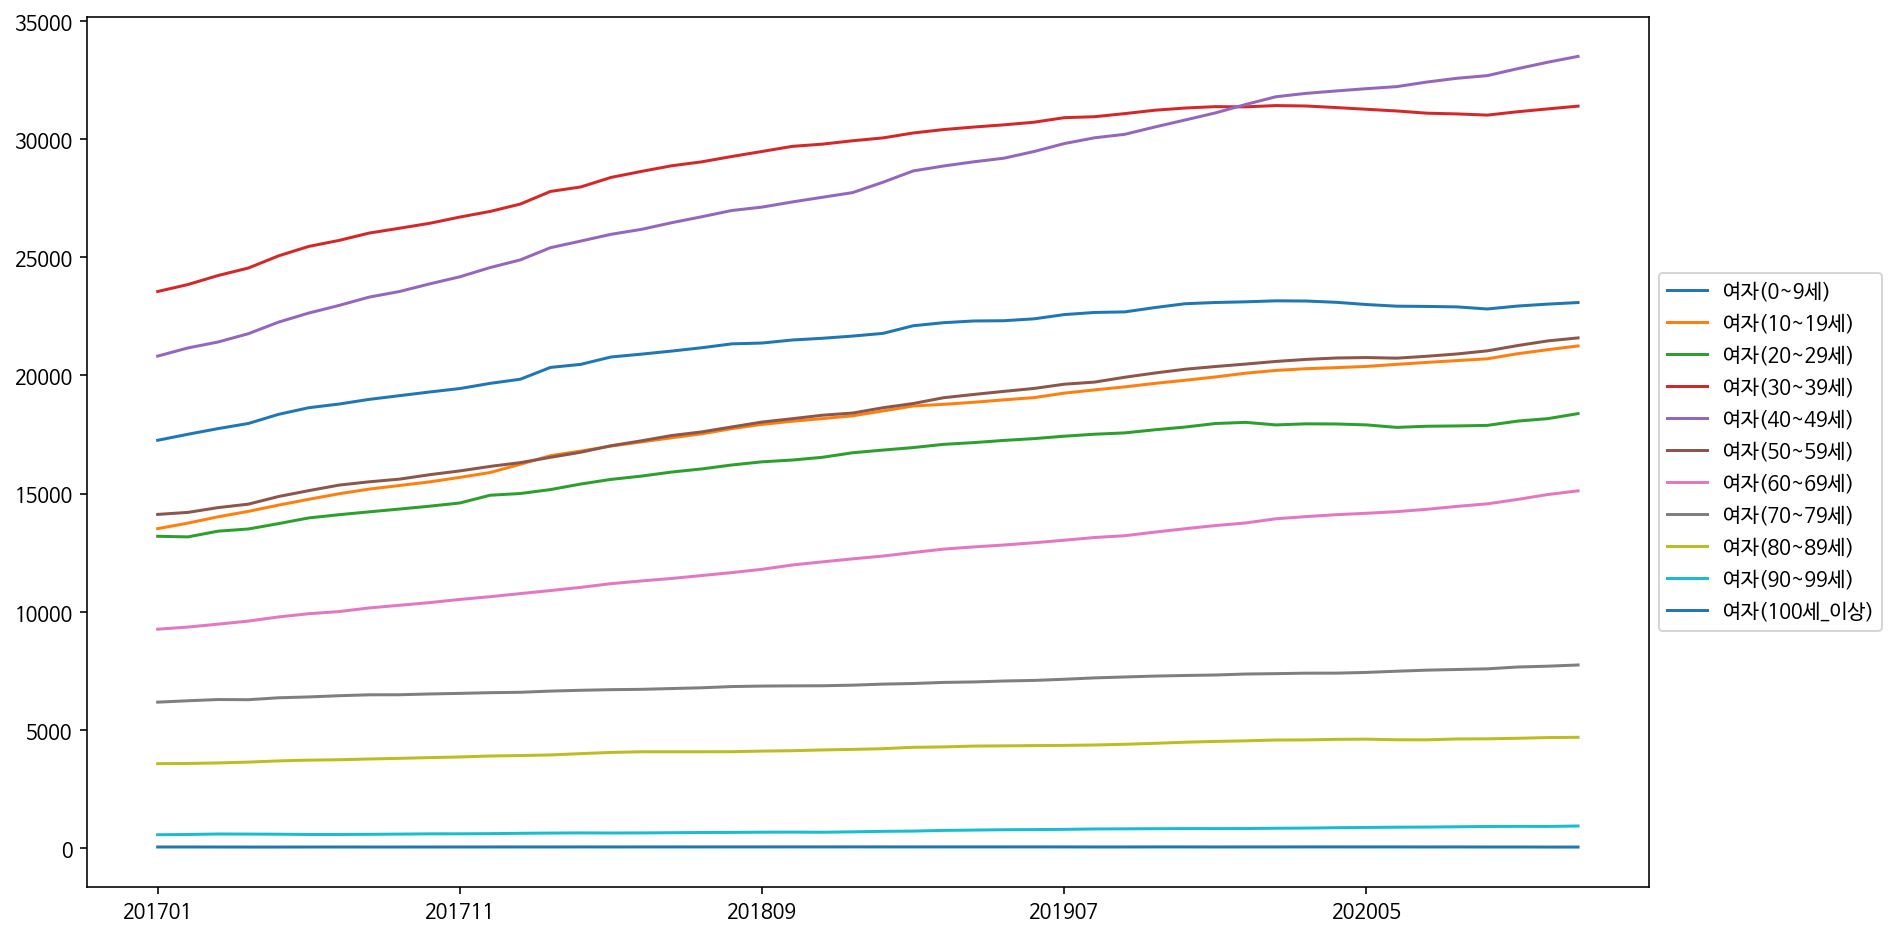

In [ ]:
Sejong_SY.iloc[:,11:].plot(figsize = (14,8))
plt.rc('font', family='NanumBarunGothic')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
Sejong_check = df3.iloc[:,:1]
Sejong_check['인구변동'] = 0

Sejong_check.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


읍면동,세종특별자치시,인구변동
201701,243925,0
201702,246601,0
201703,250147,0
201704,253089,0
201705,258138,0
